In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import pickle as pk
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt

collected 3093 input samples
collected 3093 target samples


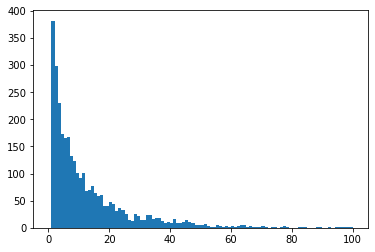

In [2]:
# parse data to end at affect

data = pd.read_csv('affect_behavior_action_clips.csv')
data = data.sort_values(['user_id.x', 'time_sequence', 'start_time', 'attemptcount']).reset_index()

input_names = ['time_taken', 'correct', 'original', 'hint', 'hintcount', 'total_hints', 'scaffold', 'bottom_hint', 'attemptcount', 'no_prob_type', 'algebra', 'choose_1', 'choose_n', 'fill_in_1', 'open_response']
target_names = ['confusion', 'concentration', 'boredom', 'frustration']

ss = StandardScaler()
data[input_names] = ss.fit_transform(data[input_names])

input_data = []
target_data = []
sequence_lengths = []

start = 0
last_user = 0
last_sequence = 0
last_assignment = 0

for i, row in data.iterrows():
    user_change = last_user != row['user_id.x']
    sequence_change = last_sequence != row['time_sequence']
    assignment_change = last_assignment != row['assignment_id.x']
    if (user_change or sequence_change or assignment_change):
        start = i
        last_user = row['user_id.x']
        last_sequence = row['time_sequence']
        last_assignment = row['assignment_id.x']
    if np.sum(data.iloc[i][target_names].values) == 1:
        sequence_lengths.append(i+1 - start)
        input_data.append(data.iloc[start:i+1][input_names].fillna(0).values)
        target_data.append(data.iloc[i][target_names].values)

print(f'collected {len(input_data)} input samples')
print(f'collected {len(target_data)} target samples')
pk.dump(input_data, open('input_data.pkl', 'wb'))
pk.dump(target_data, open('target_data.pkl', 'wb'))
plt.figure()
plt.hist(sequence_lengths, np.arange(101))
plt.show()